Run 1/10: Accuracy = 0.99
Run 2/10: Accuracy = 0.99
Run 3/10: Accuracy = 0.98
Run 4/10: Accuracy = 0.98
Run 5/10: Accuracy = 0.98
Run 6/10: Accuracy = 0.98
Run 7/10: Accuracy = 0.99
Run 8/10: Accuracy = 0.99
Run 9/10: Accuracy = 0.99
Run 10/10: Accuracy = 0.98


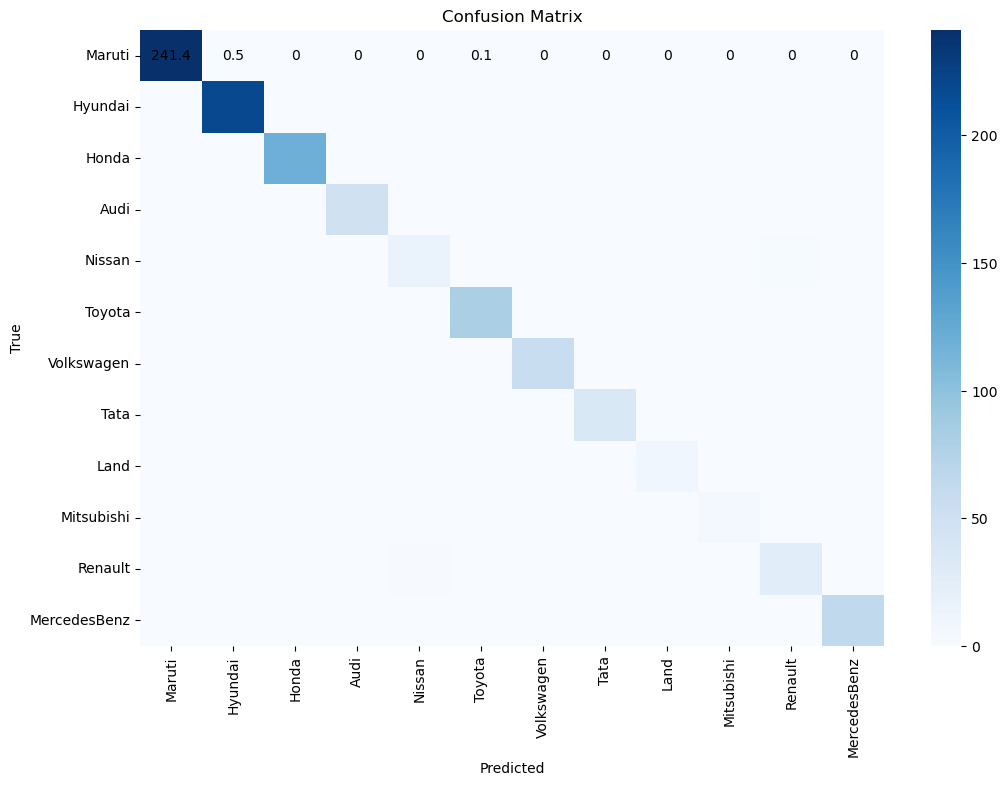

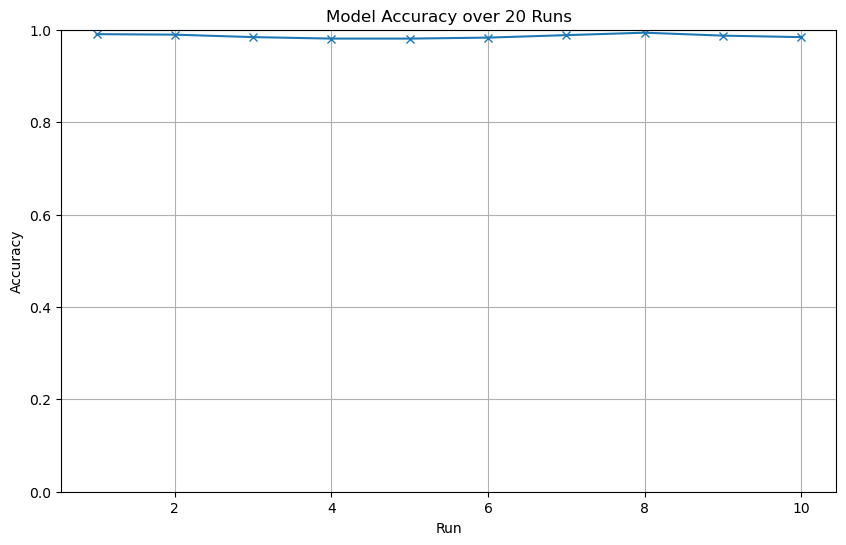

Average Accuracy over 20 runs: 0.99


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('new_car_data.csv')

# Columns to drop
columns_to_drop = [
    # Add columns you want to drop from the new data
]

# Drop specified columns
data = data.drop(columns_to_drop, axis=1)
data = data.dropna()

# List of features
features = [
    "Engine CC",
    "Power",
    "Seats",
    "Mileage Km/L",
    # Add more features as needed
]

# Define X (features) and y (target)
X = data[features]
y = data["Manufacturer"]

# Get all unique class labels and filter to the first 12
class_labels = y.unique()[:12]

# Filter data to include only the first 12 manufacturers
data_filtered = data[data['Manufacturer'].isin(class_labels)]
X_filtered = data_filtered[features]
y_filtered = data_filtered["Manufacturer"]

# Initialize lists to store accuracy scores and confusion matrices
accuracies = []
conf_matrices = []

# Run the model 20 times
for i in range(10):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=i)

    # Initialize and train the model
    model = RandomForestClassifier(random_state=i)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Generate confusion matrix with consistent labels
    conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)
    conf_matrices.append(conf_matrix)

    # Print progress
    print(f'Run {i+1}/10: Accuracy = {accuracy:.2f}')

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot the average confusion matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(avg_conf_matrix, annot=True, fmt='g', cmap='Blues', 
                 xticklabels=class_labels, yticklabels=class_labels, 
                 annot_kws={"size": 10, "color": "black"})
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
plt.show()

# Plot the accuracy over 20 runs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='x')
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over 20 Runs')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print final average accuracy
avg_accuracy = np.mean(accuracies)
print(f'Average Accuracy over 20 runs: {avg_accuracy:.2f}')
